In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers as tfl
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping as ES
#from IPython.display import clear_output as cls
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
import tensorflow as tf

In [2]:
'''
data=ImageDataGenerator(featurewise_center=False, samplewise_center=False, 
                        featurewise_std_normalization=False, samplewise_std_normalization=False,
                        zca_whitening=False, zca_epsilon=1e-6, rotation_range=30, width_shift_range=50.,
                        height_shift_range=20., brightness_range=None, shear_range=0., zoom_range=0., 
                        channel_shift_range=0., fill_mode='nearest', cval=0., horizontal_flip=False, 
                        vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, 
                        validation_split=0.2, dtype=None)
'''

"\ndata=ImageDataGenerator(featurewise_center=False, samplewise_center=False, \n                        featurewise_std_normalization=False, samplewise_std_normalization=False,\n                        zca_whitening=False, zca_epsilon=1e-6, rotation_range=30, width_shift_range=50.,\n                        height_shift_range=20., brightness_range=None, shear_range=0., zoom_range=0., \n                        channel_shift_range=0., fill_mode='nearest', cval=0., horizontal_flip=False, \n                        vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, \n                        validation_split=0.2, dtype=None)\n"

In [3]:
imaga_s=(150,150)

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
                                                       validation_split=0.2,
                                                       subset='training',
                                                       seed=123,shuffle=True,
                                                    
                                                       image_size=imaga_s,
                                                       batch_size=50
                                                      )

Found 75000 files belonging to 5 classes.
Using 60000 files for training.


2023-01-22 16:03:20.240736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 16:03:20.338940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 16:03:20.339865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 16:03:20.343718: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
'''
train_data=data.flow_from_directory(directory='/kaggle/input/rice-image-dataset/Rice_Image_Dataset',target_size=(150, 150), 
                                    color_mode='rgb', classes=None,
                                    class_mode='categorical', batch_size=32, shuffle=True,
                                    seed=None, save_to_dir=None, save_prefix='',
                                    save_format='png', follow_links=False, 
                                    subset='training', interpolation='nearest')
'''

"\ntrain_data=data.flow_from_directory(directory='/kaggle/input/rice-image-dataset/Rice_Image_Dataset',target_size=(150, 150), \n                                    color_mode='rgb', classes=None,\n                                    class_mode='categorical', batch_size=32, shuffle=True,\n                                    seed=None, save_to_dir=None, save_prefix='',\n                                    save_format='png', follow_links=False, \n                                    subset='training', interpolation='nearest')\n"

In [6]:
class_labels = train_data.class_names
class_labels

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [7]:
class_size = [len(os.listdir('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/' + name)) for name in class_labels]
class_size

[15000, 15000, 15000, 15000, 15000]

In [8]:
test_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
                                                       validation_split=0.2,
                                                       subset='validation',
                                                       seed=123,shuffle=True,
                                                    
                                                       image_size=imaga_s,
                                                       batch_size=50
                                                      )

Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [9]:
'''
test_data=data.flow_from_directory(directory='/kaggle/input/rice-image-dataset/Rice_Image_Dataset',target_size=(150, 150), 
                                    color_mode='rgb', classes=None,
                                    class_mode='categorical', batch_size=32, shuffle=True,
                                    seed=123, save_to_dir=None, save_prefix='',
                                    save_format='png', follow_links=False, 
                                    subset='validation', interpolation='nearest')
'''

"\ntest_data=data.flow_from_directory(directory='/kaggle/input/rice-image-dataset/Rice_Image_Dataset',target_size=(150, 150), \n                                    color_mode='rgb', classes=None,\n                                    class_mode='categorical', batch_size=32, shuffle=True,\n                                    seed=123, save_to_dir=None, save_prefix='',\n                                    save_format='png', follow_links=False, \n                                    subset='validation', interpolation='nearest')\n"

In [1]:
model = Sequential()
model.add(Conv2D(120,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3))
model.add(Dropout(0.2))

model.add(Conv2D(260,(5,5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(3,3))
model.add(Dropout(0.3))

model.add(Conv2D(364,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(4064,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4064,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [11]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [12]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [13]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [14]:
history = model.fit(train_data,batch_size=50, epochs=10, verbose=1,
                     callbacks=[model_checkpoint_callback,es,reduce_lr],
                    validation_data=test_data)

Epoch 1/10


2023-01-22 16:03:36.834624: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-22 16:03:39.150573: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1200/1200 [==============================] - 230s 184ms/step - loss: 0.9828 - accuracy: 0.8044 - val_loss: 1.2662 - val_accuracy: 0.6484
Epoch 2/10
1200/1200 [==============================] - 112s 93ms/step - loss: 0.4700 - accuracy: 0.8599 - val_loss: 0.2238 - val_accuracy: 0.9254
Epoch 3/10
1200/1200 [==============================] - 114s 95ms/step - loss: 0.3487 - accuracy: 0.9051 - val_loss: 0.1555 - val_accuracy: 0.9562
Epoch 4/10
1200/1200 [==============================] - 108s 90ms/step - loss: 0.3117 - accuracy: 0.9195 - val_loss: 0.1555 - val_accuracy: 0.9613
Epoch 5/10
1200/1200 [==============================] - 111s 92ms/step - loss: 0.2627 - accuracy: 0.9307 - val_loss: 0.2453 - val_accuracy: 0.9477
Epoch 6/10
1200/1200 [==============================] - 110s 92ms/step - loss: 0.3103 - accuracy: 0.9268 - val_loss: 301.1698 - val_accuracy: 0.6131
Epoch 7/10
1200/1200 [==============================] - 108s 90ms/step - loss: 0.2792 - accuracy: 0.9291 - val_loss: 1.3596 - 

In [15]:
model.evaluate(test_data)

300/300 [==============================] - 13s 41ms/step - loss: 0.5980 - accuracy: 0.8743


[0.5979587435722351, 0.8743333220481873]

In [16]:
score = model.evaluate(test_data)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

300/300 [==============================] - 12s 40ms/step - loss: 0.5980 - accuracy: 0.8743
Test loss: 0.597959041595459
Test accuracy: 0.8743333220481873


In [18]:
np.argmax(predicted_labels[7])

1

In [19]:
predicted_labelsa=np.array(predicted_labels)

In [20]:
np.argmax(predicted_labels[3])

3

In [21]:
true_labels[3]

3

In [29]:
test_classes = test_data.class_names
test_classes

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [39]:

true_labels = []
predicted_labels = []

for x, y in test_data:
    true_labels.append(y)
    predicted_labels.append(model.predict(x))

true_labels = np.concatenate(true_labels, axis=0)
predicted_labels = np.concatenate(predicted_labels, axis=0)

In [44]:
predicted_labels[12]

array([0.5544659 , 0.00721308, 0.01580492, 0.08721901, 0.33529714],
      dtype=float32)

In [56]:
print(class_names)
str(class_names[np.argmax(predicted_labels[i])])

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


'Basmati'

In [73]:
print(class_names)
cls=np.arange(len(class_names))
print(cls)
str(class_names[np.argmax(predicted_labels[i])])
str(cls[np.argmax(predicted_labels[i])])



['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
[0 1 2 3 4]


'1'

In [81]:
model.predict(images)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 9.82000634e-34,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.78834235e-34,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.30932485e-31, 3.29355033e-13,
        0.00000000e+00],
       [2.98627851e-31, 1.00000000e+00, 1.62182999e-22, 1.75259462e-09,
        1.43042473e-37],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 3.03787194e-36, 4.60961471e-16,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.21094412e-21,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.99822192e-21,
        0.00000000e+00],
       [8.42267752e-01, 1.03525294e-03, 1.18392240e-03, 2.22634058e-02,
        1.33249551e-01],
       [1.83513272e-04, 4.7781

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


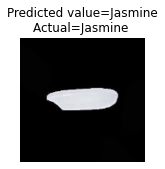

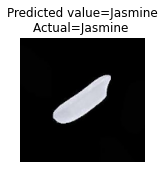

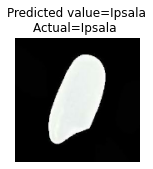

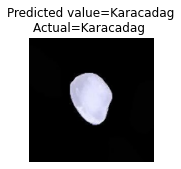

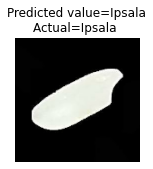

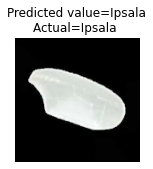

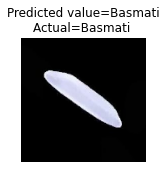

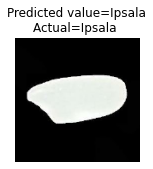

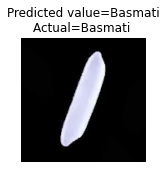

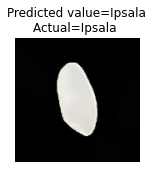

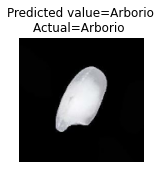

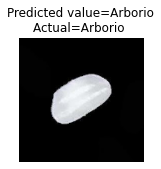

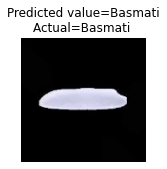

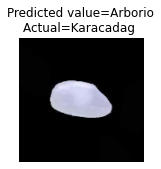

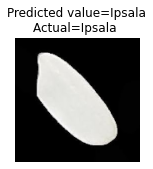

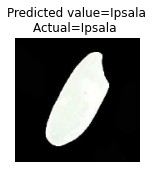

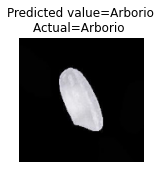

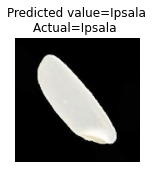

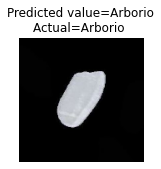

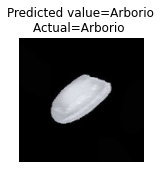

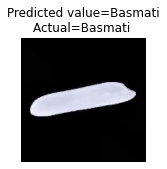

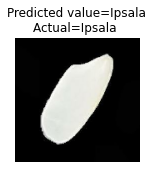

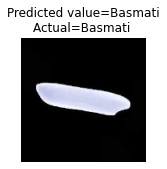

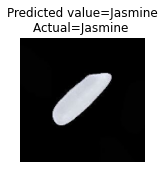

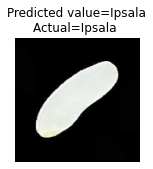

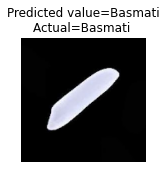

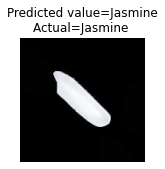

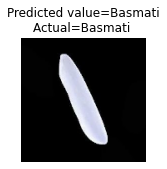

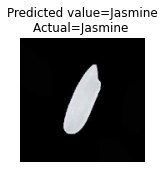

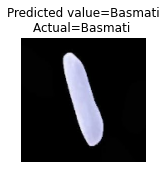

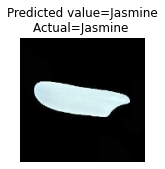

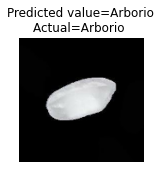

In [105]:

true_labels = []
predicted_labels = []

for x, y in test_data.take(1):
    true_labels.append(y)
    predicted_labels.append(model.predict(x))
    true_labels = np.concatenate(true_labels, axis=0)
    predicted_labels = np.concatenate(predicted_labels, axis=0)
    for i in range(32):
        plt.figure(figsize=(16, 16))
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(x[i].numpy().astype("uint8"))               
        plt.title("Predicted value={}\nActual={} ".format (str(class_names[np.argmax(predicted_labels[i])]),class_names[true_labels[i]]))
        
        plt.axis("off")

#true_labels = np.concatenate(true_labels, axis=0)
#predicted_labels = np.concatenate(predicted_labels, axis=0)

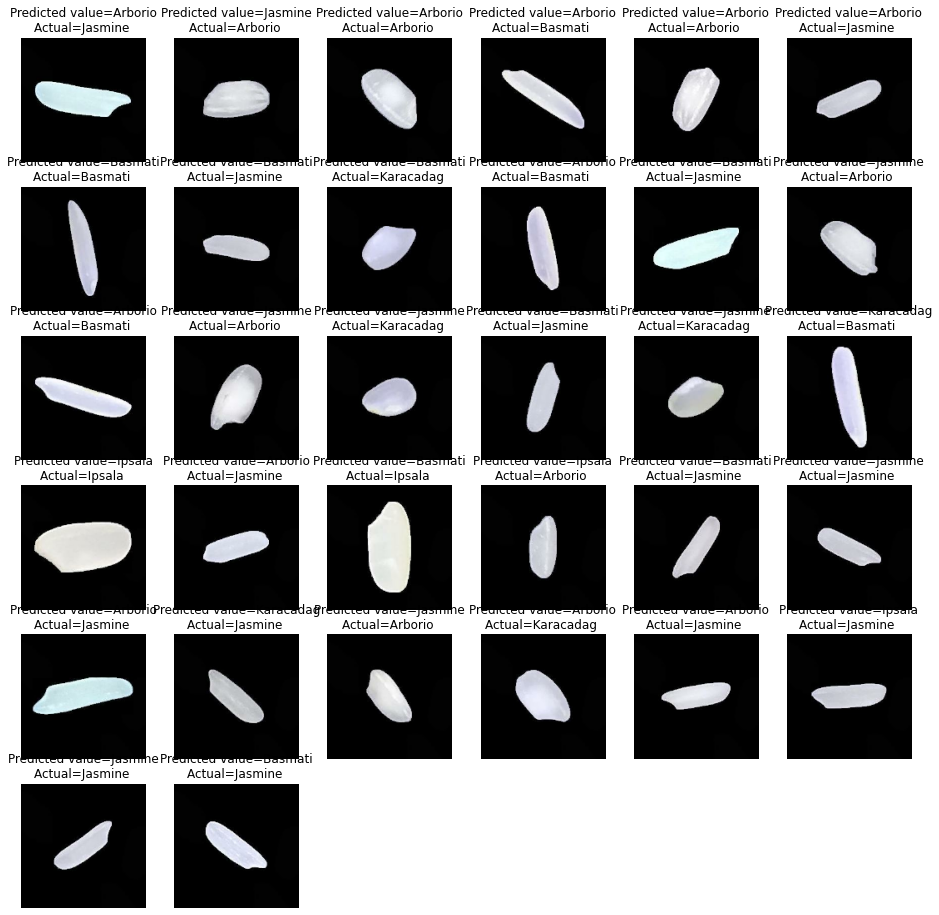

In [74]:
plt.figure(figsize=(16, 16))
class_names = test_data.class_names
for images, labels in test_data.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #axes[i].set_title('Prediction={}\nActual={}'.format(a,y[i])) 
        plt.title("Predicted value={}\nActual={} ".format (str(class_names[np.argmax(predicted_labels[i])]),class_names[labels[i]]))
        #a=predicted_labels[i]
        #plt.title('Prediction={}\nActual={}'.format(a,class_names[labels[i]]))    
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [33]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_data:
    predictions = np.concatenate([predictions, model.predict_classes(x)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

    tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
    
    
     

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [30]:
test_images = test_data[0]
test_labels = test_data[1]
test_images[0]
test_labels[1]

TypeError: 'BatchDataset' object is not subscriptable

In [26]:
x,y = test_data.next()

AttributeError: 'BatchDataset' object has no attribute 'next'

In [70]:
print(class_names)
cls=np.arange(len(class_names))
print(cls)
str(class_names[np.argmax(predicted_labels[i])])
str(cls[np.argmax(predicted_labels[i])])

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
[0 1 2 3 4]


'1'

In [72]:
from sklearn.metrics import classification_report
print(classification_report(true_labels , cls[np.argmax(predicted_labels[i])]))

TypeError: Singleton array 1 cannot be considered a valid collection.

In [ ]:
true_labels,np.argmax(predicted_labels)

In [60]:
from sklearn.metrics import confusion_matrix

In [ ]:
true_labels_list = []
predicted_labels_list = [] 

for (tr_lbl, pr_lbl) in zip (true_labels, predicted_labels):
    true_labels_list.append(np.argmax(tr_lbl))
    predicted_labels_list.append(np.argmax(pr_lbl))
    
true_labels_list = np.array(true_labels_list)
predicted_labels_list = np.array(predicted_labels_list)

cf_matrix = confusion_matrix(y_true=true_labels_list, y_pred=predicted_labels_list, normalize='pred')